# Estimation of Obesity Levels

## Project Overview
This notebook analyzes an obesity dataset to predict obesity levels based on various factors such as eating habits, physical activity, and demographics.

### **Dataset Overview**
The dataset contains various features related to diet, lifestyle, and body measurements.
We will preprocess the data, perform feature engineering, and apply machine learning models.

### **Steps Covered**
- Data loading and exploration
- Data preprocessing (encoding, normalization, handling missing values)
- Model training and evaluation

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")


In [2]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Convert NObeyesdad to Numerical Values

In [4]:

# Define obesity levels mapping
obesity_mapping = {
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 2,
    "Obesity_Type_I": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_III": 5
}


# Apply mapping to convert `NObeyesdad` to numerical values
df["Obesity_Level"] = df["NObeyesdad"].map(obesity_mapping)

df = df.dropna(subset=["Obesity_Level"])

# Ensure target column is an integer (not float)
df["Obesity_Level"] = df["Obesity_Level"].astype(int)

# Drop the original categorical column
df = df.drop(columns=["NObeyesdad"])

Encode Categorical Variables via One-Hot Encoding

In [5]:
# Identify categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Normalize Numerical Columns

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns (excluding the target)
numerical_cols = df.select_dtypes(include=['float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split


# Define Features (X) and Target (y)
X = df.drop(columns=["Obesity_Level"])  # Features
y = df["Obesity_Level"]  # Target

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1471, Testing samples: 368


Machine Learning Model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9402173913043478
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.98      0.82      0.89        61
           2       0.89      0.89      0.89        55
           3       0.97      0.97      0.97        64
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        59

    accuracy                           0.94       368
   macro avg       0.94      0.94      0.94       368
weighted avg       0.94      0.94      0.94       368


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],  # More trees for better performance
    "max_depth": [10, 20, None],  # Control overfitting
    "min_samples_split": [2, 5, 10],  # Min samples needed for splitting
    "min_samples_leaf": [1, 2, 4],  # Min samples per leaf (regularization)
    "max_features": ["sqrt", "log2"]  # Feature selection per split
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


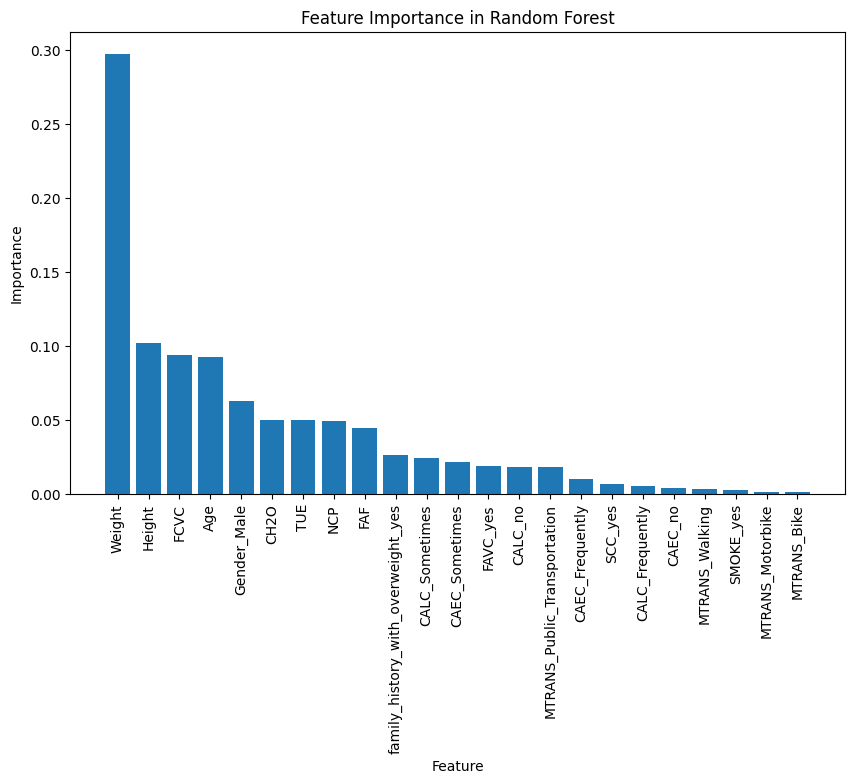

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort descending

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [11]:
# Train with best parameters
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Optimized Accuracy: 0.9510869565217391
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        63
           1       1.00      0.84      0.91        61
           2       0.93      0.91      0.92        55
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        59

    accuracy                           0.95       368
   macro avg       0.96      0.95      0.95       368
weighted avg       0.96      0.95      0.95       368
